In [9]:
import xarray as  xr
import glob
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

from uwtrajectory.AMSR.add_to_trajectory import add_AMSR_to_trajectory
from uwtrajectory import utils, config
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
ds = xr.open_dataset('/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/rf06_72h_forward_2.3.nc')




In [11]:
    box_degrees=2
    lats, lons, times = ds.lat.values, ds.lon.values, ds.time.values
    space_index = int(np.round(box_degrees/0.25/2)) # go up/down/left/right this many pixels
    
    
    unique_days = set([utils.as_datetime(i).date() for i in times])
    ens_files = [os.path.join(config.ERA_ens_source, config.ERA_ens_fmt.format(i)) for i in unique_days]

In [12]:


    data =  xr.open_mfdataset(sorted(ens_files), combine='by_coords')
# #         data = data.rename({'level': 'ens_level'})
#         ds.coords['number'] = data.coords['number']
# #         ds.coords['ens_level'] = data.coords['ens_level']
    

In [14]:
ens_files

['/home/disk/eos4/jkcm/Data/CSET/ERA5/ensemble/ERA5.enda.pres.NEP.2015-07-17.nc',
 '/home/disk/eos4/jkcm/Data/CSET/ERA5/ensemble/ERA5.enda.pres.NEP.2015-07-18.nc',
 '/home/disk/eos4/jkcm/Data/CSET/ERA5/ensemble/ERA5.enda.pres.NEP.2015-07-20.nc',
 '/home/disk/eos4/jkcm/Data/CSET/ERA5/ensemble/ERA5.enda.pres.NEP.2015-07-19.nc']

In [13]:
data.coordscon

Coordinates:
  * latitude   (latitude) float32 60.0 59.5 59.0 58.5 58.0 ... 1.5 1.0 0.5 0.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float32 -160.0 -159.5 -159.0 ... -111.0 -110.5 -110.0
  * time       (time) datetime64[ns] 2015-07-17 ... 2015-07-20T21:00:00

In [243]:
all_files = sorted(glob.glob('/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/rf*.nc'))
old_files = sorted(glob.glob('/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf*.nc'))
all_bases = [os.path.basename(i) for i in all_files]
for f in old_files:
    if os.path.basename(f) not in all_bases:
        print(f)

# for f in all_files:
#     ds = xr.open_dataset(f)
#     ds = add_AMSR_to_trajectory(ds)
# #     print(f'/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/temp/{os.path.basename(f)}')
# #     ds.to_netcdf(f'/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/temp/{os.path.basename(f)}')
# for i, f in enumerate(all_files):
#     if 'rf06_72h_forward' in f:
#         print(i, f)
# print(all_files[36])
# ds = xr.open_dataset(all_files[8])




box_degrees=2

/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf06_48h_backward_1.6.nc
/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf06_48h_backward_2.0.nc
/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf06_48h_backward_2.3.nc
/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf06_48h_backward_2.6.nc
/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf06_48h_backward_3.0.nc
/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf06_72h_forward_1.6.nc
/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf06_72h_forward_2.0.nc
/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf06_72h_forward_2.3.nc
/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf06_72h_forward_2.6.nc
/home/disk/eos4/jkcm/Data/CSET/Lagrangian_project/trajectory_files/old/rf06_72h_forward_3.0.nc


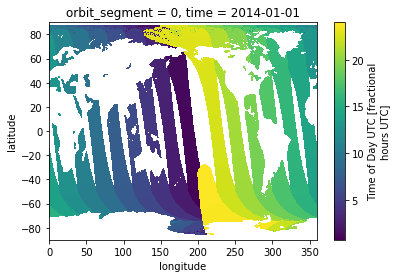

In [193]:
data.UTCtime.isel(time=0, orbit_segment=0).plot()

In [208]:


    lats, lons, times = ds.lat.values, ds.lon.values, pd.DatetimeIndex(ds.time.values)
    data = xr.open_mfdataset('/home/disk/eos9/jkcm/Data/amsr/rss/all/amsr_unified_*-*.nc', combine='by_coords')
    dummy = np.full_like(lats, fill_value=np.nan)
    vals_dict = {'AMSR_CWV': {'name': 'vapor', 'means': dummy.copy(), 'stds': dummy.copy(), 'n_samples': dummy.copy()},
                'AMSR_LWP': {'name': 'cloud', 'means': dummy.copy(), 'stds': dummy.copy(), 'n_samples': dummy.copy()},
                'AMSR_SST': {'name': 'sst', 'means': dummy.copy(), 'stds': dummy.copy(), 'n_samples': dummy.copy()},
                }
    for i, (lat, lon, time) in enumerate(zip(lats, lons%360, times)):
        lst = time.hour + 24*((lon+180)%360-180)/360
        for orbit in [0,1]:
            data_subs = data.sel(time=time.replace(hour=0), orbit_segment=orbit,
                                 longitude=slice(lon - box_degrees/2, lon + box_degrees/2),
                                 latitude=slice(lat - box_degrees/2, lat + box_degrees/2))
            x = np.nanmean(data_subs.UTCtime)
            if np.isnan(x):
                print('out of swath, skipping')
                continue
            slice_time = data_subs.time.values + np.timedelta64(int(x), 'h') + np.timedelta64(int((x-int(x))*60), 'm')
            time_miss = (slice_time-time)/np.timedelta64(1, 'h')
            if np.abs(time_miss)<1: #within an hour of data sample
                for var in vals_dict.values():
                    var['means'][i] = np.nanmean(data_subs[var['name']].values)
                    var['stds'][i] = np.nanstd(data_subs[var['name']].values)
                    var['n_samples'][i] = np.sum(~np.isnan(data_subs[var['name']].values))
                                                                  
    for var,vals in vals_dict.items():
        attrs = data[vals['name']].attrs
        ds[var] = (('time'), vals['means'], attrs)
        attrs.update(long_name=attrs['long_name']+', standard deviation over box')
        ds[var+'_std'] = (('time'), vals['stds'], attrs)
        ds[var+'_nsamples'] = (('time'), vals['n_samples'], {'long_name': ds[var].attrs['long_name']+', number of samples'})

In [50]:
data.time.plot

In [63]:
data.se

<xarray.Dataset>
Dimensions:        (latitude: 720, longitude: 1440, orbit_segment: 2)
Coordinates:
  * latitude       (latitude) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * orbit_segment  (orbit_segment) int64 0 1
  * longitude      (longitude) float64 0.125 0.375 0.625 ... 359.4 359.6 359.9
    time           datetime64[ns] 2015-07-10
Data variables:
    UTCtime        (orbit_segment, latitude, longitude) float64 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    cloud          (orbit_segment, latitude, longitude) float64 dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    ice            (orbit_segment, latitude, longitude) bool dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    land           (orbit_segment, latitude, longitude) bool dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    nodata         (orbit_segment, latitude, longitude) bool dask.array<chunksize=(2, 720, 1440), meta=np.ndarray>
    rain           (orbit_segment, latitude, longitud

In [17]:
data = xr.open_mfdataset('/home/disk/eos9/jkcm/Data/amsr/rss/all/amsr_unified_*-*.nc', combine='by_coords')
#cloud, vapor, sst


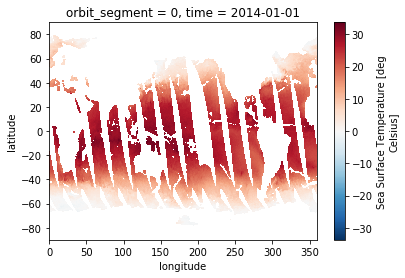

In [33]:
data.sst.isel(time=0, orbit_segment=0).plot()

In [28]:
data

<xarray.Dataset>
Dimensions:        (latitude: 720, longitude: 1440, orbit_segment: 2, time: 1096)
Coordinates:
  * latitude       (latitude) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * orbit_segment  (orbit_segment) int64 0 1
  * longitude      (longitude) float64 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * time           (time) datetime64[ns] 2014-01-01 2014-01-02 ... 2016-12-31
Data variables:
    UTCtime        (time, orbit_segment, latitude, longitude) float64 dask.array<chunksize=(31, 2, 720, 1440), meta=np.ndarray>
    cloud          (time, orbit_segment, latitude, longitude) float64 dask.array<chunksize=(31, 2, 720, 1440), meta=np.ndarray>
    ice            (time, orbit_segment, latitude, longitude) bool dask.array<chunksize=(31, 2, 720, 1440), meta=np.ndarray>
    land           (time, orbit_segment, latitude, longitude) bool dask.array<chunksize=(31, 2, 720, 1440), meta=np.ndarray>
    nodata         (time, orbit_segment, latitude, longitude) bool dask.array<chunk

In [8]:
CAMS_data

<xarray.Dataset>
Dimensions:    (latitude: 94, level: 9, longitude: 67, time: 248)
Coordinates:
  * longitude  (longitude) float32 -35.0 -34.25 -33.5 -32.75 ... 13.0 13.75 14.5
  * level      (level) int32 500 600 700 800 850 900 925 950 1000
  * latitude   (latitude) float32 9.75 9.0 8.25 7.5 ... -58.5 -59.25 -60.0
  * time       (time) datetime64[ns] 2017-08-01 ... 2017-08-31T21:00:00
Data variables:
    co         (time, level, latitude, longitude) float32 dask.array<chunksize=(120, 9, 94, 67), meta=np.ndarray>
    aermr04    (time, level, latitude, longitude) float32 dask.array<chunksize=(120, 9, 94, 67), meta=np.ndarray>
    aermr05    (time, level, latitude, longitude) float32 dask.array<chunksize=(120, 9, 94, 67), meta=np.ndarray>
    aermr06    (time, level, latitude, longitude) float32 dask.array<chunksize=(120, 9, 94, 67), meta=np.ndarray>
    aermr09    (time, level, latitude, longitude) float32 dask.array<chunksize=(120, 9, 94, 67), meta=np.ndarray>
    aermr07    (time, le